In [ ]:
!pip install kaggle

In [ ]:
# Create the directory
!mkdir -p ~/.kaggle

# Move the file there
!cp kaggle.json ~/.kaggle/

# Change permissions so the API can read it
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 98% 702M/715M [00:01<00:00, 268MB/s]
100% 715M/715M [00:01<00:00, 375MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.2/494.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 15.4 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', 'r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


###Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)
len(filenames)

50000

In [ ]:
filenames[:15]

['21493.png',
 '23849.png',
 '20835.png',
 '16210.png',
 '28877.png',
 '34946.png',
 '29416.png',
 '9126.png',
 '26615.png',
 '5889.png',
 '24422.png',
 '35260.png',
 '43287.png',
 '29859.png',
 '4791.png']

###Processing trainLabels.csv file

In [ ]:
df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
df.shape

(50000, 2)

- In trainLabels.csv id are stored order wise
- But in train filenames are not in order of id

In [ ]:
df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [ ]:
labels = [labels_dictionary[i] for i in df['label']]

print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


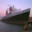

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/32873.png')
cv2_imshow(img)

In [ ]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


***Image Processing***

In [ ]:
# converting images to numpy array
train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + ".png")
  image = np.array(image)
  data.append(image)

In [ ]:
type(data[0])

data[0].shape

(32, 32, 3)

In [ ]:
# Converting image and data to numpy arrays
X = np.array(data)
Y = np.array(labels)


In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


***train_test_split***

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

***Buliding the Neural Network***

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# Building the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(num_of_classes, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # for numerical values
    metrics=['accuracy']
)

In [ ]:
model.fit(
    X_train_scaled,
    Y_train,
    epochs=10,
    validation_split=0.1  # 0.1(10%) of training data is used for validation after each epoch
)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1672 - loss: 2.2229 - val_accuracy: 0.2192 - val_loss: 1.9993
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2395 - loss: 2.0047 - val_accuracy: 0.2422 - val_loss: 1.9527
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2428 - loss: 1.9693 - val_accuracy: 0.2510 - val_loss: 1.9386
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2483 - loss: 1.9453 - val_accuracy: 0.2475 - val_loss: 1.9365
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2499 - loss: 1.9418 - val_accuracy: 0.2488 - val_loss: 1.9137
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2545 - loss: 1.9254 - val_accuracy: 0.2467 - val_loss: 1.9214
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2480 - loss: 1.9375 - val_accuracy: 0.2535 - val_loss: 1.9165
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2519 - loss: 1.9281 - 

***Not having Good Accuracy***

**We must use a pretrained model (Transfer Learning) for this**

*Using ***ResNet50*** Model*

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras import optimizers
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
convolution_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
# imagenet -> Training based on images data
# include_top -> Donot include the output layer
# input_shape -> model accepts image in (256,256,3)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
convolution_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))   #Height*2 and Weight*2 -> 64
model.add(layers.UpSampling2D((2,2)))   #Height*2 and Weight*2 -> 128
model.add(layers.UpSampling2D((2,2)))   #Height*2 and Weight*2 -> 256
model.add(convolution_base)
model.add(layers.Flatten())             #Converting to arrays
model.add(layers.BatchNormalization())  #Scaling in one range (already done not neccesary)
model.add(layers.Dense(128, activation="relu"))   #As in basic
model.add(layers.Dropout(0.5))                    #Turn off some neurons - Reduces Overfitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation="softmax"))  #As in basic

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 446s 345ms/step - accuracy: 0.3336 - loss: 2.0224 - val_accuracy: 0.7430 - val_loss: 0.9067
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.6805 - loss: 1.0498 - val_accuracy: 0.8880 - val_loss: 0.4649
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.8016 - loss: 0.7515 - val_accuracy: 0.9168 - val_loss: 0.3497
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 344ms/step - accuracy: 0.8631 - loss: 0.5800 - val_accuracy: 0.9317 - val_loss: 0.2907
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.9103 - loss: 0.4412 - val_accuracy: 0.9308 - val_loss: 0.2576
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - accuracy: 0.9328 - loss: 0.3518 - val_accuracy: 0.9308 - val_loss: 0.2410
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - accuracy: 0.9504 - loss: 0.2904 - val_accuracy: 0.9377 - val_loss: 0.2230
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - accuracy: 0.9343 - loss: 0.2357
Loss:  0.22729262709617615
Accuracy:  0.9369000196456909


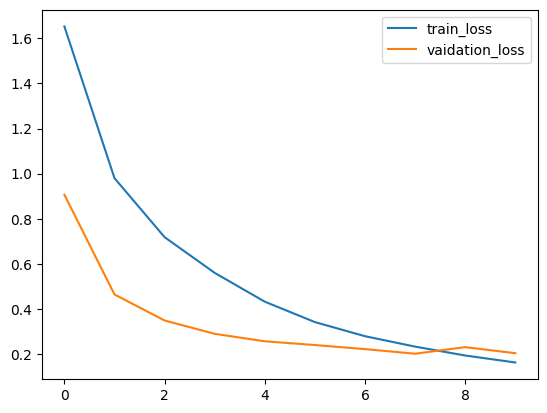

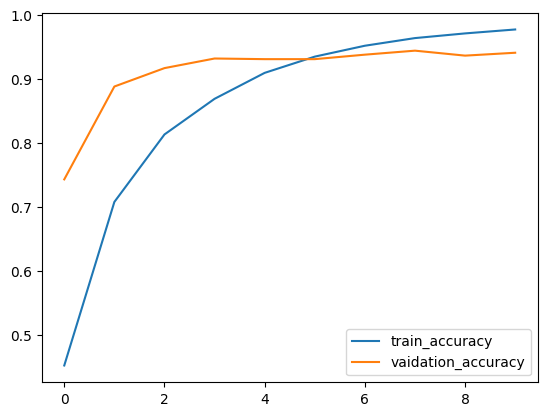

In [ ]:
h = history

#Plot the Loss Value
plt.plot(h.history['loss'], label="train_loss")
plt.plot(h.history['val_loss'], label="vaidation_loss")
plt.legend()
plt.show()

#Plot the  Accuracy Value
plt.plot(h.history['accuracy'], label="train_accuracy")
plt.plot(h.history['val_accuracy'], label="vaidation_accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
print(model.input_shape)


NameError: name 'model' is not defined